In [ ]:
! pip install transformers

     |████████████████████████████████| 2.6 MB 5.0 MB/s 
     |████████████████████████████████| 895 kB 48.7 MB/s 
     |████████████████████████████████| 636 kB 58.7 MB/s 
     |████████████████████████████████| 3.3 MB 39.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import pipeline

In [ ]:
summarizer = pipeline("summarization")
summarizer("An apple a day, keeps the doctor away", min_length=5, max_length=20)

Your max_length is set to 20, but you input_length is only 11. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


[{'summary_text': ' An apple a day, keeps the doctor away from your doctor away, says Dr.'}]

In [ ]:
pubmed_dataset_test ="/content/drive/MyDrive/pubmed-dataset/test.txt"

In [ ]:
import json

data = []
with open(pubmed_dataset_test) as f:
    for line in f:
      data.append(json.loads(line))

In [ ]:
data

In [ ]:
len(data)

6658

In [ ]:
data[0]['abstract_text']

["<S> research on the implications of anxiety in parkinson 's disease ( pd ) has been neglected despite its prevalence in nearly 50% of patients and its negative impact on quality of life . </S>",
 '<S> previous reports have noted that neuropsychiatric symptoms impair cognitive performance in pd patients ; however , to date , no study has directly compared pd patients with and without anxiety to examine the impact of anxiety on cognitive impairments in pd . </S>',
 '<S> this study compared cognitive performance across 50 pd participants with and without anxiety ( 17 pda+ ; 33 pda ) , who underwent neurological and neuropsychological assessment . </S>',
 '<S> group performance was compared across the following cognitive domains : simple attention / visuomotor processing speed , executive function ( e.g. , set - shifting ) , working memory , language , and memory / new verbal learning . </S>',
 '<S> results showed that pda+ performed significantly worse on the digit span forward and back

In [ ]:
abstract = data[0]['abstract_text']

In [ ]:
len(abstract)

7

In [ ]:
document_text =data[0]['article_text']

In [ ]:
type(document_text)

list

In [ ]:
summarizer = pipeline("summarization")
generated_summary = summarizer(document_text, min_length=5, max_length=20)

In [ ]:
 ## Recall-Oriented Understudy for Gisting Evaluation (ROUGE)

In [ ]:
! pip install rouge

In [ ]:
from rouge import Rouge 

hypothesis = "the #### transcript is a written version of each day 's cnn student news program use this transcript to he    lp students with reading comprehension and vocabulary use the weekly newsquiz to test your knowledge of storie s you     saw on cnn student news"

reference = "this page includes the show transcript use the transcript to help students with reading comprehension and     vocabulary at the bottom of the page , comment for a chance to be mentioned on cnn student news . you must be a teac    her or a student age # # or older to request a mention on the cnn student news roll call . the weekly newsquiz tests     students ' knowledge of even ts in the news"

rouge = Rouge()
scores = rouge.get_scores(hypothesis, reference)

In [ ]:
scores

[{'rouge-1': {'f': 0.49411764217577864,
   'p': 0.5833333333333334,
   'r': 0.42857142857142855},
  'rouge-2': {'f': 0.23423422957552154,
   'p': 0.3170731707317073,
   'r': 0.18571428571428572},
  'rouge-l': {'f': 0.44705881864636676,
   'p': 0.5277777777777778,
   'r': 0.3877551020408163}}]

In [ ]:
generated_summary

[{'summary_text': " anxiety affects quality of life in those living with parkinson 's disease (pd"},
 {'summary_text': ' anxiety rather than depression is the most prominent and prevalent mood disorder in pd patients .'},
 {'summary_text': ' Our current understanding of anxiety and its impact on cognition in pd lags far behind'},
 {'summary_text': ' neuropsychiatric symptoms in pd have been shown to be negatively associated with cognitive performance'},
 {'summary_text': ' Higher depression scores have been correlated with lower scores on the mini - mental state exam ('},
 {'summary_text': ' apathy and anhedonia in pd patients have been associated with executive dysfunction .'},
 {'summary_text': ' Few studies have specifically investigated the relationship between anxiety and cognition in pd .'},
 {'summary_text': ' A study showed a negative relationship between anxiety ( both state and trait ) and overall cognitive'},
 {'summary_text': ' trait anxiety was negatively associated with e

In [ ]:

type(generated_summary)

list

In [ ]:
generated_summary[0]['summary_text']

" anxiety affects quality of life in those living with parkinson 's disease (pd"

In [ ]:
total_summary = ""
for sentence in generated_summary:
  
  total_summary = total_summary + sentence['summary_text']

In [ ]:
total_summary

" anxiety affects quality of life in those living with parkinson 's disease (pd anxiety rather than depression is the most prominent and prevalent mood disorder in pd patients . Our current understanding of anxiety and its impact on cognition in pd lags far behind neuropsychiatric symptoms in pd have been shown to be negatively associated with cognitive performance Higher depression scores have been correlated with lower scores on the mini - mental state exam ( apathy and anhedonia in pd patients have been associated with executive dysfunction . Few studies have specifically investigated the relationship between anxiety and cognition in pd . A study showed a negative relationship between anxiety ( both state and trait ) and overall cognitive trait anxiety was negatively associated with each of the cognitive domains assessed by the rbans Two further studies have examined whether anxiety differentially affects cognition in patients with left - sided apathy but not anxiety was associated 

In [ ]:
abstract

["<S> research on the implications of anxiety in parkinson 's disease ( pd ) has been neglected despite its prevalence in nearly 50% of patients and its negative impact on quality of life . </S>",
 '<S> previous reports have noted that neuropsychiatric symptoms impair cognitive performance in pd patients ; however , to date , no study has directly compared pd patients with and without anxiety to examine the impact of anxiety on cognitive impairments in pd . </S>',
 '<S> this study compared cognitive performance across 50 pd participants with and without anxiety ( 17 pda+ ; 33 pda ) , who underwent neurological and neuropsychological assessment . </S>',
 '<S> group performance was compared across the following cognitive domains : simple attention / visuomotor processing speed , executive function ( e.g. , set - shifting ) , working memory , language , and memory / new verbal learning . </S>',
 '<S> results showed that pda+ performed significantly worse on the digit span forward and back

In [ ]:
reference_summary =""
for sentence in abstract:
  sent = sentence.replace('<S>',"") 
  sent2 = sent.replace('</S>',"") 
  
  reference_summary =  reference_summary +sent2  

In [ ]:
reference_summary  

" research on the implications of anxiety in parkinson 's disease ( pd ) has been neglected despite its prevalence in nearly 50% of patients and its negative impact on quality of life .  previous reports have noted that neuropsychiatric symptoms impair cognitive performance in pd patients ; however , to date , no study has directly compared pd patients with and without anxiety to examine the impact of anxiety on cognitive impairments in pd .  this study compared cognitive performance across 50 pd participants with and without anxiety ( 17 pda+ ; 33 pda ) , who underwent neurological and neuropsychological assessment .  group performance was compared across the following cognitive domains : simple attention / visuomotor processing speed , executive function ( e.g. , set - shifting ) , working memory , language , and memory / new verbal learning .  results showed that pda+ performed significantly worse on the digit span forward and backward test and part b of the trail making task ( tmt 

In [ ]:
rouge = Rouge()
scores = rouge.get_scores(total_summary, reference_summary)

In [ ]:
scores

[{'rouge-1': {'f': 0.28286189376452453,
   'p': 0.17453798767967146,
   'r': 0.7456140350877193},
  'rouge-2': {'f': 0.09626555752106204,
   'p': 0.05708661417322835,
   'r': 0.30687830687830686},
  'rouge-l': {'f': 0.2462562365265877,
   'p': 0.15195071868583163,
   'r': 0.6491228070175439}}]

Recall

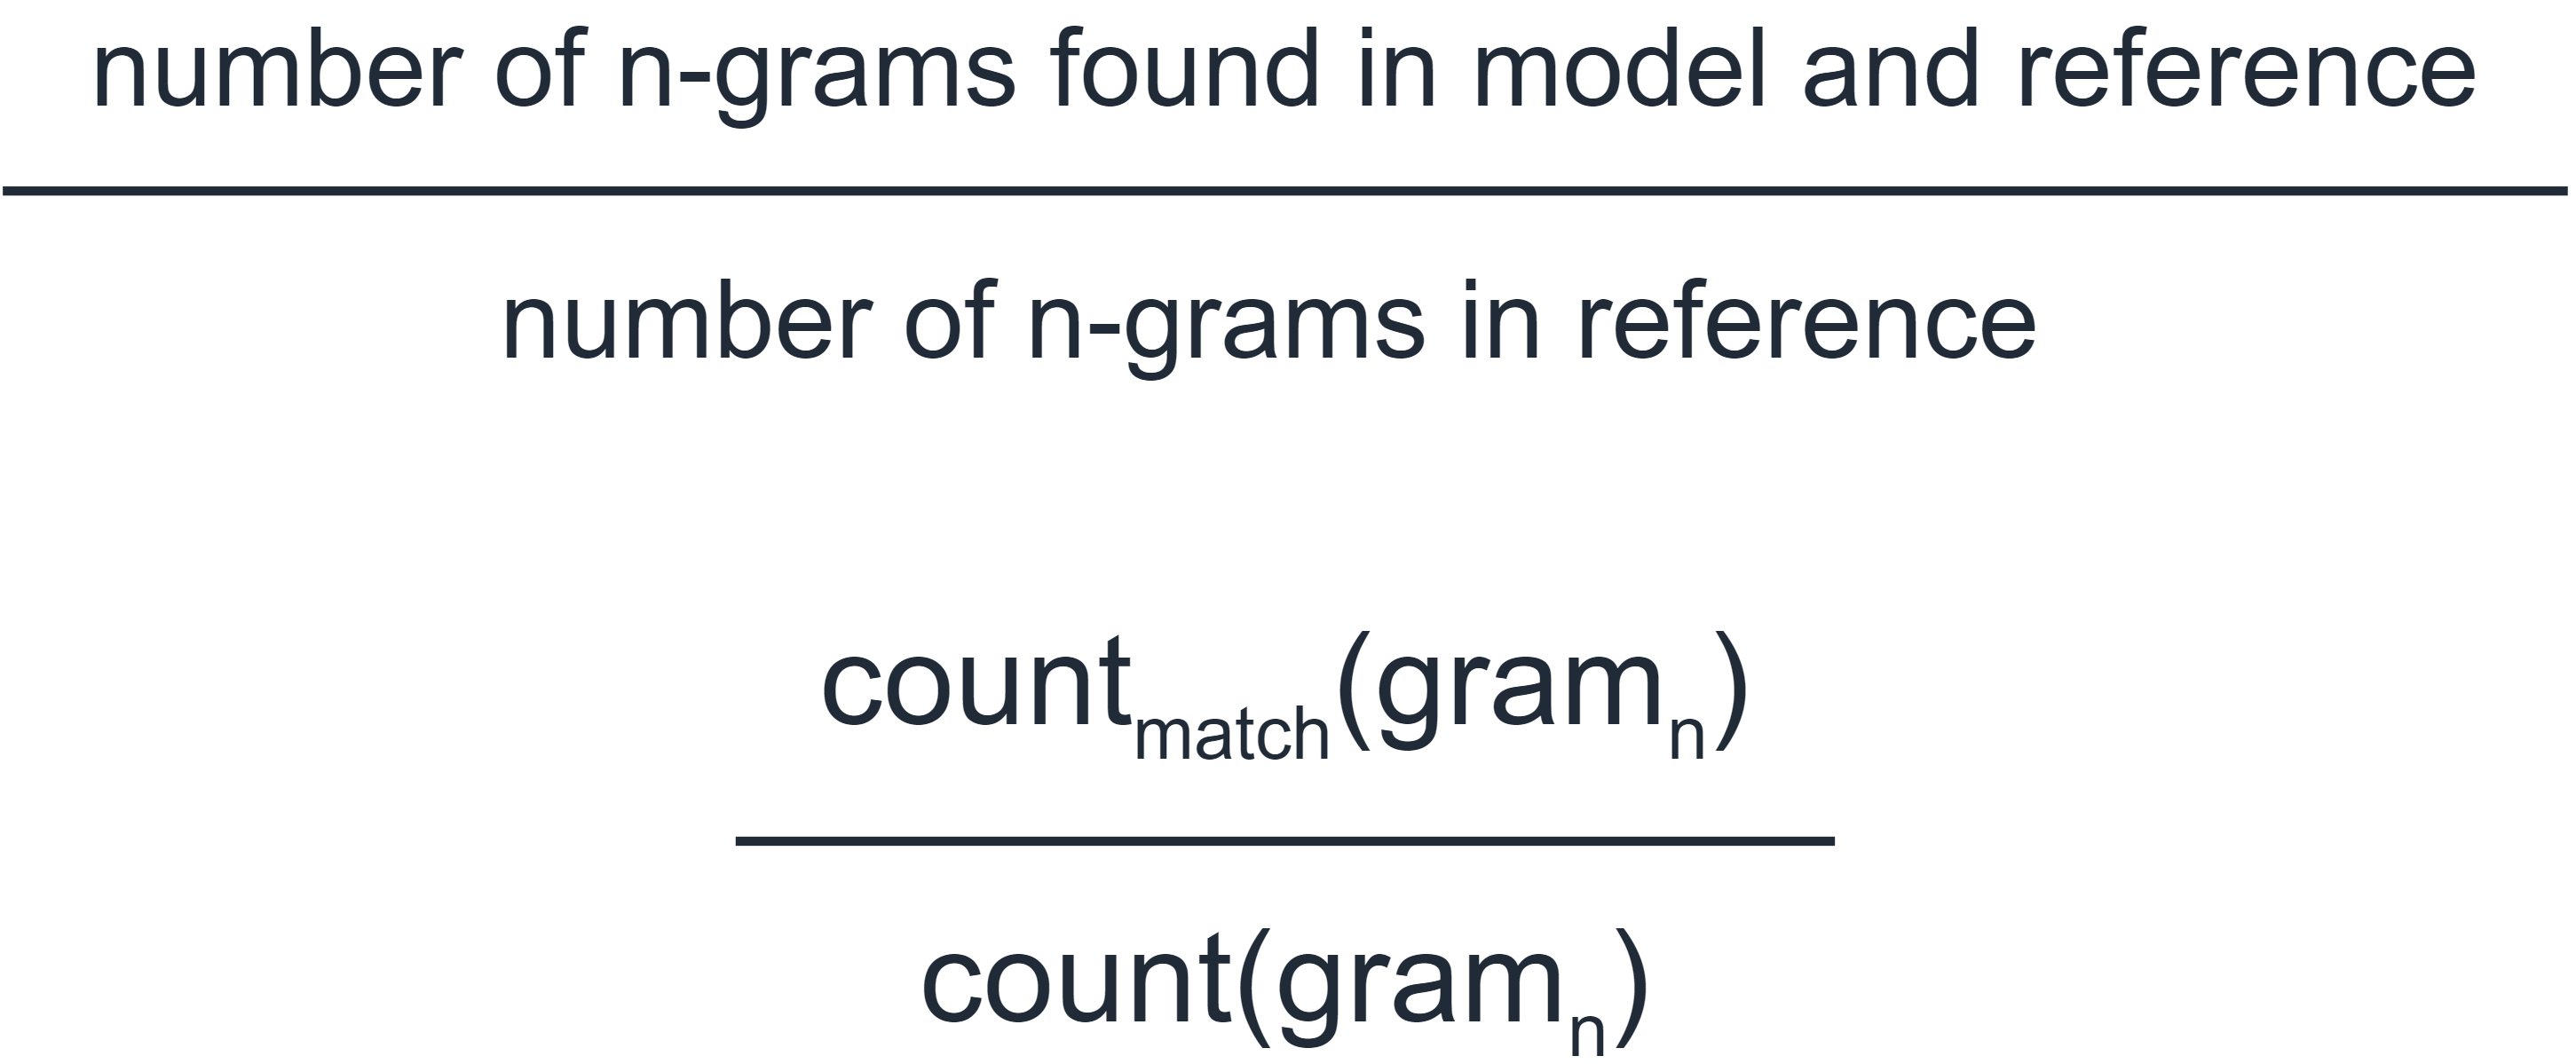

Precison

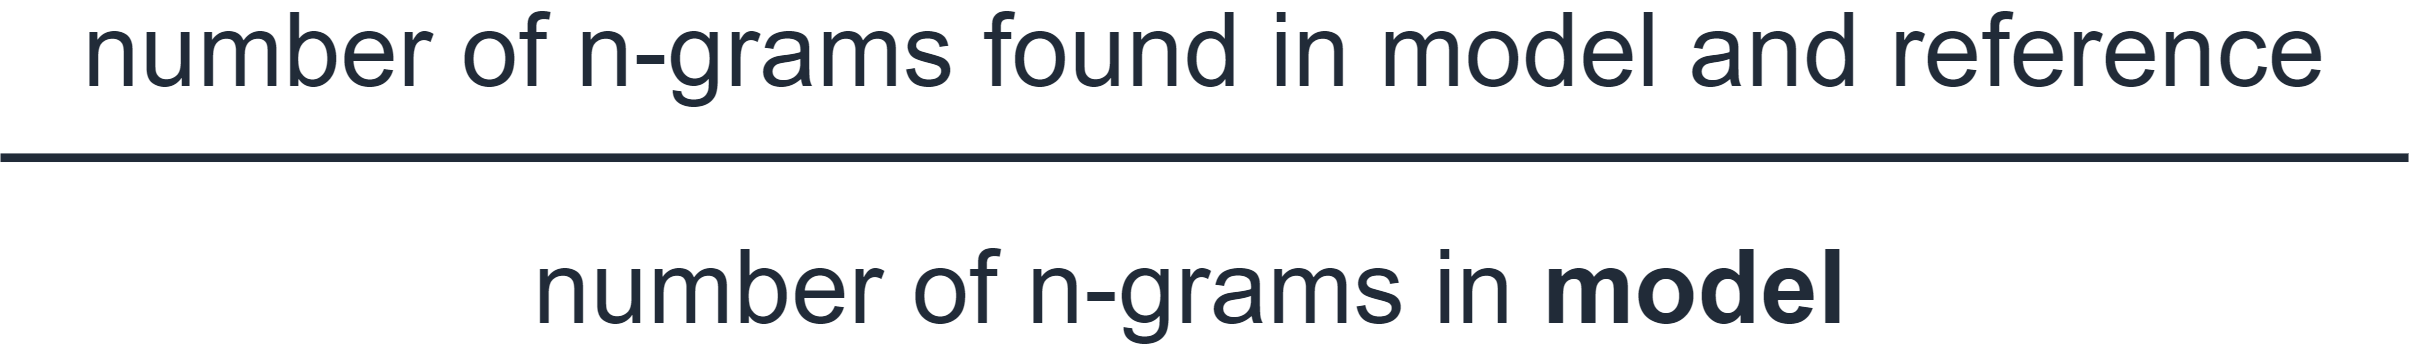

#Text Summarisation on the sample CNN daily mail dataset and other example comparing different algoritms 

In [21]:
original_text = """
Junk foods taste good that’s why it is mostly liked by everyone of any age group especially kids and school going children. They generally ask for the junk food daily because they 
have been  trend so by their parents from the childhood. They never have been discussed by their parents about the harmful effects of junk foods over health. According to the 
research by  scientists, it has been found that junk foods have negative effects on the health in many ways. They are generally fried food found in the market in the packets. 
They become high in calories, high in cholesterol, low in healthy nutrients, high in sodium mineral, high in sugar, starch, unhealthy fat, lack of protein and lack of dietary fibers.
 Processed and junk foods are the means of rapid and unhealthy weight gain and negatively impact the whole body throughout the life. It makes able a person to gain excessive 
 weight which is called as obesity. Junk foods tastes good and looks good however do not fulfil the healthy calorie requirement of the body. Some of the foods like french fries, 
 fried foods, pizza, burgers, candy, soft drinks, baked goods, ice cream, cookies, etc are the example of high-sugar and high-fat containing foods. It is found according to the 
 Centres for Disease Control and Prevention that Kids and children eating junk food are more prone to the type-2 diabetes. In type-2 diabetes our body become unable to regulate
  blood sugar level. Risk of getting this disease is increasing as one become more obese or overweight. It increases the risk of kidney failure. Eating junk food daily lead us to
 the nutritional deficiencies in the body because it is lack of essential nutrients, vitamins, iron, minerals and dietary fibers. It increases risk of cardiovascular diseases 
 because it is rich in saturated fat, sodium and bad cholesterol. High sodium and bad cholesterol diet increases blood pressure and overloads the heart functioning. One who like
  junk food develop more risk to put on extra weight and become fatter and unhealthier. Junk foods contain high level carbohydrate which spike blood sugar level and make person 
  more lethargic, sleepy and less active and alert. Reflexes and senses of the people eating this food become dull day by day thus they live more sedentary life. Junk foods are
   the source of constipation and other disease like diabetes, heart ailments, clogged arteries, heart attack, strokes, etc because of being poor in nutrition. Junk food is the easiest way to gain unhealthy weight. The amount of fats and sugar in the food makes you gain weight rapidly. However, this is not a healthy weight. It is more of fats and cholesterol which will have a harmful impact on your health. Junk food is also one of the main reasons for the increase in obesity nowadays.This food only looks and tastes good, other than that, it has no positive points. The amount of calorie your body requires to stay fit is not fulfilled by this food. For instance, foods like French fries, burgers, candy, and cookies, all have high amounts of sugar and fats. Therefore, this can result in long-term illnesses like diabetes and high blood pressure. This may also result in kidney failure. Above all, you can get various nutritional deficiencies when you don’t consume the essential nutrients, vitamins, minerals and more. You become prone to cardiovascular diseases due to the consumption of bad cholesterol and fat plus sodium. In other words, all this interferes with the functioning of your heart. Furthermore, junk food contains a higher level of carbohydrates. It will instantly spike your blood sugar levels. This will result in lethargy, inactiveness, and sleepiness. A person reflex becomes dull overtime and they lead an inactive life. To make things worse, junk food also clogs your arteries and increases the risk of a heart attack. Therefore, it must be avoided at the first instance to save your life from becoming ruined.The main problem with junk food is that people don’t realize its ill effects now. When the time comes, it is too late. Most importantly, the issue is that it does not impact you instantly. It works on your overtime; you will face the consequences sooner or later. Thus, it is better to stop now.You can avoid junk food by encouraging your children from an early age to eat green vegetables. Their taste buds must be developed as such that they find healthy food tasty. Moreover, try to mix things up. Do not serve the same green vegetable daily in the same style. Incorporate different types of healthy food in their diet following different recipes. This will help them to try foods at home rather than being attracted to junk food.In short, do not 
 deprive them completely of it as that will not help. Children will find one way or the other to have it. Make sure you give them junk food in limited quantities and at healthy 
 periods of time. '

Referece: CNN Daily Mail Dataset


In [ ]:
document_text="""
 Hello, everyone! This Tuesday on CNN Student News, we're taking you under thebig top. First, though, we're headed down themighty Mississippi. First Up: Flood Waters Rising 
 . AZUZ: That would be the Mississippi River, which is causing floods up and down its path through the
United States. Want to take you down the river now to check out some of what's been going on. We're
gonna start in southern Illinois, in the city of Cairo. You see it right there on your screen. Flooding was threatening to wipe out the entire
town. The U.S. Army Corps of Engineers came up with this plan to help Cairo and some other communities nearby. And that brings us down into Missouri. 
What the Corps did was intentionally blow up a levee, a barrier that's designed to
actually prevent flooding. That helped the towns up in Illinois, but it purposely flooded some
parts of Missouri, some farms. And a lot of people, especially farmers, angry with this plan.
One farmer said she felt like she was suffering for somebody else. The flooding has followed the
Mississippi's path through Arkansas and down into Louisiana, as you see here. Yesterday, engineers
opened a spillway north of the city of New Orleans. The goal here is to help ease the
pressure on the river, hopefully lower the flood levels, keep the water away from New Orleans. But
just to get an idea of how much water we're talking about, a commander with the Army Corps of
Engineers offered an analogy. He said the water that's rushing through the Mississippi right now,
in one second, could fill up an area the size of a football field 44 feet deep. We're also seeing
flooding in states that the Mississippi branches off to, like Tennessee. Holly Firfer has more on
the situation there. (BEGIN VIDEO) HOLLY FIRFER, CNN NATIONAL CORRESPONDENT: Tennessee's largest
city is in the cross hairs. Memphis now has the "most high-risk population" for flooding,
according to the Army Corps of Engineers. On Tuesday, authorities expect the Mississippi to
crest at 48 feet outside the city, less than afoot shy of the record level set in 1937. With the
Mississippi swollen by a month of abnormally high rainfall, its tributaries are overflowing, with
nowhere for their water to flow. At least 1,100 homes and trailers in and around Memphis have been
evacuated. 400 residents of Shelby County are currently in shelters. On Sunday, officials went
door to door to alert others that they may also need to leave their homes. The mayor of Memphis is
confident that all those who need to escape the rising waters will be evacuated. MAYOR AC WHARTON,
MEMPHIS, TENNESSEE: We'll get them out. Some are holding out to the last minute, but we think in
the end they're going to come on out. FIRFER: Officials say while there is great pressure on the
levees around Memphis, they are currently performing as expected. (END VIDEO) Is This Legit?
TOMEKA JONES, CNN STUDENT NEWS: Is this legit? The United States and China have the world's largest
economies. Legit! That means these countries have a lot of influence when it comes to globa finances.
 Economic Talks . AZUZ: Well, the global economy is one of the big issues ahead as
representatives from the U.S. and China meet in Washington this week. This is the third set of
meetings between the two governments. Last week, one Chinese economic official said, "To be frank,
we have different views that make discussion necessary." Some of those different views have to
do with the economic policies of the U.S. and China. Since they're the world's biggest
economies, what each country does -- its economic practices, the decisions it makes -- can have a
pretty big impact on the other nation. Some other subjects are likely to come up during the
meetings. That includes human rights, concerns about North Korea's nuclear program, and the U.S.
and China working together to fight terrorism. Reactors . AZUZ: Moving to Japan, where officials
are shutting down a nuclear power plant. Not the Fukushima Daiichi plant, the one we've talked
about since Japan's earthquake and tsunami in March. No, the one we're talking about today is
the Hamaoka plant. The owner announced it's being shut down after Japan's prime minister warned that
Hamaoka was vulnerable to natural disasters, like the ones that damaged the Fukushima plant.
Hamaoka's owner says safety is his company's first priority. Meanwhile, workers went back inside one
of the reactors at the Fukushima plant yesterday.
They were checking on a ventilation system that was installed last week. The system is filtering
out radioactive substances so that engineers can go in and shut down the reactor. Shoutout . MATT
CHERRY, CNN STUDENT NEWS: Today's Shoutout goes out to Miss Abromitis' class at the Sarah Rawson
Smith School in Atlanta, Georgia! What is the scientific name for a fear of heights? Here we go!
Is it: A) Agoraphobia, B) Aurophobia, C) Acrophobia or D) Arachnophobia? You've got three
seconds -- GO! Fear of heights is acrophobia, from the root word acro, which means height. That's
your answer and that's your Shoutout! Gamma Phi Circus . AZUZ: That's also where we get the word
acrobat, like tightrope walkers and trapeze artists; the kind of folks you'd see in a circus.
Ted Rowlands visited a school in Illinois where students can train to be part of the show. It's
not clown college. It's a regular university where the person sitting next to you in Chemistry 101
could be double-majoring in Circus Studies. (BEGIN VIDEO) UNIDENTIFIED MALE: Is our identity going to
become more external than it has been internal? TED ROWLANDS, CNN CORRESPONDENT: Sarah Bowden is a
sophomore at Illinois State University. UNIDENTIFIED MALE: Boys and girls, children of all
ages. ROWLANDS: She is also a circus performer.
Sarah is part of Illinois State's Gamma Phi Circus, a school-sponsored circus team that dates
back to 1929. It's the oldest of two college circus programs in the country; the other is at
Florida State. SARAH BOWDEN, CIRCUS PERFORMER, ILLINOIS STATE UNIVERSITY STUDENT: So, this is the
basic way to get up into the lyric hoop. ROWLANDS:
Sarah was a gymnast in high school, but like most of her teammates had no circus experience. What do
your parents think of all this? BOWDEN: My parents are really supportive. You know, the minute I
joined the circus, they're like, "What, you joined the circus?" MARCUS ALOUAN, CIRCUS DIRECTOR,
ILLINOIS STATE UNIVERSITY: I think any one of us who has ever come through Gamma Phi Circus has had
that conversation with their parents where they're trying to explain that it's still a part of the
university, but it's something in addition to going to classes. ROWLANDS: Marcus Alouan, a
former student at Illinois State and circus performer, is now the director of the circus
program. ALOUAN: For the most part, we look for somebody who's strong, hardworking and coachable.
ROWLANDS: And doesn't have a fear of heights? ALOUAN: That certainly helps. Although, actually,
we have a lot of people who seek us out because they want to overcome that. ROWLANDS: Senior Nena
Woo, who broke her arm in a trapeze fall, says after graduating, she wants to join a professional
circus. NENA WOO, CIRCUS PERFORMER, ILLINOIS STATE UNIVERSITY STUDENT: I'm graduating with a degree
in public relations. If I can do that with a circus company or somewhere in entertainment, I'd
love to do that. ROWLANDS: The circus team has about 75 members. They don't compete, but they do
perform every spring. Dating back more than 80
years, Gamma Phi Circus puts on a series of shows
at the university. This was Sarah's first performance. BOWDEN: Not in a million years did I
think I'd be in a circus. So, I am so happy that I did it, though. ROWLANDS: Ted Rowlands, CNN,
Normal, Illinois. (END VIDEO) Blog Report . AZUZ: A school without grade levels: We talked about this last Wednesday. 
You're talking about it right now! Alexis starts us off: "It would help with discipline problems, but with everybody working at
their own pace, some students won't get the push they need." Avery is home schooled, but thinks students shouldn't be grouped by age but by knowledge. 
"Some students in a class grouped by age may be behind or ahead and thus ignored."Clive says it could be a good idea. "Teachers
won't have to worry about leaving students behind who struggle or giving students who are ahead lessons on what they already know." From Meg: "A
big part of school is the social part. All kidsdeserve to be with kids who are going through the same things." Celeste writes, "students who usually get caught behind will have a 
better chance to truly learn the material rather than sit in a class they don't understand." But Alex argues, "It could make kids feel like they aren't as smart as their classmates,
which would degrade their work. Some might get picked on because they aren't at the same level." Before We Go . AZUZ: Before we go, we want to show you some baby pictures. 
Never said they were gonna be human. This mini-me here is the newest addition to a safari park in Florida. Her name is Laini, and she's a southern white rhinoceros. It's usually
not polite to talk about a lady's weight, but Laini -- who's less than two weeks old -- already weighs 50 pounds! One thing's for sure: she does not have a dry wit, 
or any kind of a sense of humor, really. Goodbye . AZUZ: You can go ahead and ask her. Are you wry? No, serious. Rhi-no-cerus. It wasn't our best pun, but will it be our last? 
Rhi-no, no it won't. I'm Carl Azuz, and CNN Student News will be herding back your way tomorrow.

"""

In [ ]:
! pip install transformers

     |████████████████████████████████| 2.6 MB 26.5 MB/s 
     |████████████████████████████████| 3.3 MB 44.9 MB/s 
     |████████████████████████████████| 636 kB 58.4 MB/s 
     |████████████████████████████████| 895 kB 55.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## Summarization with XLM Transformers

In [ ]:
# Importing model and tokenizer
from transformers import XLMWithLMHeadModel, XLMTokenizer

# Instantiating the model and tokenizer 
tokenizer=XLMTokenizer.from_pretrained('xlm-mlm-en-2048')
model=XLMWithLMHeadModel.from_pretrained('xlm-mlm-en-2048')

Downloading:   0%|          | 0.00/646k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/487k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/840 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Some weights of XLMWithLMHeadModel were not initialized from the model checkpoint at xlm-mlm-en-2048 and are newly initialized: ['transformer.position_ids']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [42]:
# Encoding text to get input ids & pass them to model.generate()
inputs=tokenizer.batch_encode_plus([original_text],return_tensors='pt', max_length=512)
summary_ids=model.generate(inputs['input_ids'],early_stopping=True)

# Decode and print the summary
XLM_summary=tokenizer.decode(summary_ids[0],skip_special_tokens=True)
print(XLM_summary)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 512, but ``max_length`` is set to 20.This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


Junk foods taste good that’s why it is mostly liked by everyone of any age group especially kids and school going children. They generally ask for the junk food daily because they have been trend so by their parents from the childhood. They never have been discussed by their parents about the harmful effects of junk foods over health. According to the research by scientists, it has been found that junk foods have negative effects on the health in many ways. They are generally fried food found in the market in the packets. They become high in calories, high in cholesterol, low in healthy nutrients, high in sodium mineral, high in sugar, starch, unhealthy fat, lack of protein and lack of dietary fibers. Processed and junk foods are the means of rapid and unhealthy weight gain and negatively impact the whole body throughout the life. It makes able a person to gain excessive weight which is called as obesity. Junk foods tastes good and looks good however do not fulfil the healthy calorie r

## Summarization with GPT-2 Transformers

In [43]:
from transformers import GPT2Tokenizer,GPT2LMHeadModel

# Instantiating the model and tokenizer with gpt-2
tokenizer=GPT2Tokenizer.from_pretrained('gpt2')
model=GPT2LMHeadModel.from_pretrained('gpt2')

# Encoding text to get input ids & pass them to model.generate()
inputs=tokenizer.batch_encode_plus([document_text],return_tensors='pt',max_length=512)
summary_ids=model.generate(inputs['input_ids'],early_stopping=True)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 512, but ``max_length`` is set to 20.This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


Text Summarization using Gensim with TextRank

## Text Rank Algorithm

*   TextRank - extractive summarization technique 
*   Words which occur more frequently are significant
* Sentences containing highly frequent words are important 
* assigns scores to each sentence in the text 
The top-ranked sentences make it to the summary.

In [13]:
# Importing package and summarizer
import gensim
from gensim.summarization import summarize

In [15]:
# Passing the text corpus to summarizer 
short_summary_genensim = summarize(document_text)
print(short_summary)

. AZUZ: That would be the Mississippi River, which is causing floods up and down its path through the
gonna start in southern Illinois, in the city of Cairo.
The U.S. Army Corps of Engineers came up with this plan to help Cairo and some other communities nearby.
That helped the towns up in Illinois, but it purposely flooded some
pressure on the river, hopefully lower the flood levels, keep the water away from New Orleans.
just to get an idea of how much water we're talking about, a commander with the Army Corps of
He said the water that's rushing through the Mississippi right now,
flooding in states that the Mississippi branches off to, like Tennessee.
(BEGIN VIDEO) HOLLY FIRFER, CNN NATIONAL CORRESPONDENT: Tennessee's largest
levees around Memphis, they are currently performing as expected.
TOMEKA JONES, CNN STUDENT NEWS: Is this legit?
The United States and China have the world's largest
AZUZ: Well, the global economy is one of the big issues ahead as
Last week, one Chinese economic 

In [22]:
# Summarization when both ratio & word count is given
summary_gensim=summarize(document_text, ratio=0.1)

In [23]:
print(summary_gensim)

. AZUZ: That would be the Mississippi River, which is causing floods up and down its path through the
That helped the towns up in Illinois, but it purposely flooded some
pressure on the river, hopefully lower the flood levels, keep the water away from New Orleans.
just to get an idea of how much water we're talking about, a commander with the Army Corps of
flooding in states that the Mississippi branches off to, like Tennessee.
(BEGIN VIDEO) HOLLY FIRFER, CNN NATIONAL CORRESPONDENT: Tennessee's largest
CHERRY, CNN STUDENT NEWS: Today's Shoutout goes out to Miss Abromitis' class at the Sarah Rawson
Ted Rowlands visited a school in Illinois where students can train to be part of the show.
TED ROWLANDS, CNN CORRESPONDENT: Sarah Bowden is a
ROWLANDS: She is also a circus performer.
Sarah is part of Illinois State's Gamma Phi Circus, a school-sponsored circus team that dates
SARAH BOWDEN, CIRCUS PERFORMER, ILLINOIS STATE UNIVERSITY STUDENT: So, this is the
Sarah was a gymnast in high school

In [25]:
short_summary = summarize(original_text)
print(short_summary)

They become high in calories, high in cholesterol, low in healthy nutrients, high in sodium mineral, high in sugar, starch, unhealthy fat, lack of protein and lack of dietary fibers.
Processed and junk foods are the means of rapid and unhealthy weight gain and negatively impact the whole body throughout the life.
Junk foods tastes good and looks good however do not fulfil the healthy calorie requirement of the body.
It is found according to the Centres for Disease Control and Prevention that Kids and children eating junk food are more prone to the type-2 diabetes.
Eating junk food daily lead us to the nutritional deficiencies in the body because it is lack of essential nutrients, vitamins, iron, minerals and dietary fibers.
It increases risk of cardiovascular diseases because it is rich in saturated fat, sodium and bad cholesterol.
High sodium and bad cholesterol diet increases blood pressure and overloads the heart functioning.
One who like junk food develop more risk to put on extra 

## LexRank Summarizer

* A sentence which is similar to many other sentences of the text has a high probability of being important. 
* The approach of LexRank is that a particular sentence is recommended by other similar sentences and hence is ranked higher.
* Higher the rank, higher is the priority of being included in the summarized text.

In [26]:
# Installing and Importing sumy
!pip install sumy
import sumy

     |████████████████████████████████| 83 kB 2.2 MB/s 
     |████████████████████████████████| 10.1 MB 35.9 MB/s 
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21711 sha256=2461ef73851eacca503ec28f93288580f5ef3eb85c3a111aef8cc2ac8ec7456c
  Stored in directory: /root/.cache/pip/wheels/d4/bf/51/81d27ad638e1a6dca4f362ecc33d1e2c764b8ea7ec751b8fc1
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746883 sha256=0000faca36c16f276d3eec2b681c5796dfc7d65881eb1370d18e1196eee03586
  Stored in directory: /root/.cache/pip/wheels/57/e8/3f/120ccc1ff7541c108bc5d656e2a14c39da0d824653b62284c6
Successfully built breadability pycountry


In [27]:
# Importing the parser and tokenizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

In [28]:
# Import the LexRank summarizer
from sumy.summarizers.lex_rank import LexRankSummarizer

In [33]:
sumy.summarizers

<module 'sumy.summarizers' from '/usr/local/lib/python3.7/dist-packages/sumy/summarizers/__init__.py'>

In [34]:
# Initializing the parser
my_parser = PlaintextParser.from_string(original_text,Tokenizer('english'))

In [35]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
# Import the LexRank summarizer
from sumy.summarizers.lex_rank import LexRankSummarizer

In [39]:
# Creating a summary of 3 sentences.
lex_rank_summarizer = LexRankSummarizer()
lexrank_summary = lex_rank_summarizer(my_parser.document,sentences_count=3)

# Printing the summary
for sentence in lexrank_summary:
  print(sentence)

It is found according to the Centres for Disease Control and Prevention that Kids and children eating junk food are more prone to the type-2 diabetes.
It is more of fats and cholesterol which will have a harmful impact on your health.
Children will find one way or the other to have it.


In [41]:
lexrank_summary

(<Sentence: It is found according to the Centres for Disease Control and Prevention that Kids and children eating junk food are more prone to the type-2 diabetes.>,
 <Sentence: It is more of fats and cholesterol which will have a harmful impact on your health.>,
 <Sentence: Children will find one way or the other to have it.>)

## LSA (Latent semantic analysis)
* unsupervised learning algorithm that can be used for extractive text summarization.

* Extracts semantically significant sentences by applying singular value decomposition(SVD) to the matrix of term-document frequency. 

In [44]:
# Import the summarizer
from sumy.summarizers.lsa import LsaSummarizer

In [45]:
# Parsing the text string using PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.parsers.plaintext import PlaintextParser
parser=PlaintextParser.from_string(original_text,Tokenizer('english'))

In [47]:
# creating the summarizer
lsa_summarizer=LsaSummarizer()
lsa_summary= lsa_summarizer(parser.document,3)

# Printing the summary
for sentence in lsa_summary:
    print(sentence)

Junk foods taste good that’s why it is mostly liked by everyone of any age group especially kids and school going children.
To make things worse, junk food also clogs your arteries and increases the risk of a heart attack.
Therefore, it must be avoided at the first instance to save your life from becoming ruined.The main problem with junk food is that people don’t realize its ill effects now.


## Abstractive Summarisation with t5 transformers

In [48]:
!pip install transformers

In [53]:
! pip install sentencepiece

     |████████████████████████████████| 1.2 MB 28.4 MB/s 


In [54]:
# Importing requirements
from transformers import T5Tokenizer, T5Config, T5ForConditionalGeneration

In [59]:
# Instantiating the model and tokenizer 
my_model = T5ForConditionalGeneration.from_pretrained('t5-small')
tokenizer = T5Tokenizer.from_pretrained('t5-small')

In [57]:
# Concatenating the word "summarize:" to raw text
text = "summarize:" + original_text
text

'summarize:Junk foods taste good that’s why it is mostly liked by everyone of any age group especially kids and school going children. They generally ask for the junk food daily because they have been trend so by their parents from the childhood. They never have been discussed by their parents about the harmful effects of junk foods over health. According to the research by scientists, it has been found that junk foods have negative effects on the health in many ways. They are generally fried food found in the market in the packets. They become high in calories, high in cholesterol, low in healthy nutrients, high in sodium mineral, high in sugar, starch, unhealthy fat, lack of protein and lack of dietary fibers. Processed and junk foods are the means of rapid and unhealthy weight gain and negatively impact the whole body throughout the life. It makes able a person to gain excessive weight which is called as obesity. Junk foods tastes good and looks good however do not fulfil the health

In [ ]:
# encoding the input text
input_ids=tokenizer.encode(text, return_tensors='pt', max_length=512)

## Summarisation with BART transformers

In [61]:
# Importing the model
from transformers import BartForConditionalGeneration, BartTokenizer, BartConfig

In [62]:
# Loading the model and tokenizer for bart-large-cnn

tokenizer=BartTokenizer.from_pretrained('facebook/bart-large-cnn')
model=BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

In [63]:
# Encoding the inputs and passing them to model.generate()
inputs = tokenizer.batch_encode_plus([original_text],return_tensors='pt')
summary_ids = model.generate(inputs['input_ids'], early_stopping=True)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


In [64]:
# Decoding and printing the summary
bart_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
print(bart_summary)

Junk foods taste good that’s why it is mostly liked by everyone of any age group especially kids and school going children. They generally ask for the junk food daily because they have been trend so by their parents from the childhood. According to the research by scientists, it has been found that junk foods have negative effects on the health.
